In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler

# Exploring the dataset

In [74]:
df = pd.read_csv('/Users/test/Downloads/Projects/hotel_bookings.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [75]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [76]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

# Data Wrangling

In [78]:
#checking duplicate rows
duplicate = df[df.duplicated()]
 
print("Duplicate Rows :")
 
# Print the resultant Dataframe
duplicate

Duplicate Rows :


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
22,Resort Hotel,0,72,2015,July,27,1,2,4,2,...,No Deposit,250.0,NaN,0,Transient,84.67,0,1,Check-Out,2015-07-07
43,Resort Hotel,0,70,2015,July,27,2,2,3,2,...,No Deposit,250.0,NaN,0,Transient,137.00,0,1,Check-Out,2015-07-07
138,Resort Hotel,1,5,2015,July,28,5,1,0,2,...,No Deposit,240.0,NaN,0,Transient,97.00,0,0,Canceled,2015-07-01
200,Resort Hotel,0,0,2015,July,28,7,0,1,1,...,No Deposit,240.0,NaN,0,Transient,109.80,0,3,Check-Out,2015-07-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119349,City Hotel,0,186,2017,August,35,31,0,3,2,...,No Deposit,9.0,NaN,0,Transient,126.00,0,2,Check-Out,2017-09-03
119352,City Hotel,0,63,2017,August,35,31,0,3,3,...,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119353,City Hotel,0,63,2017,August,35,31,0,3,3,...,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119354,City Hotel,0,63,2017,August,35,31,0,3,3,...,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03


In [79]:
df.drop_duplicates(inplace = True)

In [80]:
print(df.duplicated().sum())

0


In [81]:
#Checking the missing values in the columns

import numpy as np

# replace "?" to NaN
df.replace("?", np.nan, inplace = True)
df.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [82]:
missing_data = df.isnull()
missing_data.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,False,False,False,False,False,False,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False


In [83]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")  

hotel
False    87396
Name: hotel, dtype: int64

is_canceled
False    87396
Name: is_canceled, dtype: int64

lead_time
False    87396
Name: lead_time, dtype: int64

arrival_date_year
False    87396
Name: arrival_date_year, dtype: int64

arrival_date_month
False    87396
Name: arrival_date_month, dtype: int64

arrival_date_week_number
False    87396
Name: arrival_date_week_number, dtype: int64

arrival_date_day_of_month
False    87396
Name: arrival_date_day_of_month, dtype: int64

stays_in_weekend_nights
False    87396
Name: stays_in_weekend_nights, dtype: int64

stays_in_week_nights
False    87396
Name: stays_in_week_nights, dtype: int64

adults
False    87396
Name: adults, dtype: int64

children
False    87392
True         4
Name: children, dtype: int64

babies
False    87396
Name: babies, dtype: int64

meal
False    87396
Name: meal, dtype: int64

country
False    86944
True       452
Name: country, dtype: int64

market_segment
False    87396
Name: market_segment, dtype: int64

distri

In [84]:
avg_company = df["company"].astype("float").mean(axis=0)
print("Average of company:", avg_company)

Average of company: 183.08138429359192


In [85]:
df["company"].replace(np.nan, avg_company, inplace=True)

In [86]:
avg_agent = df["agent"].astype("float").mean(axis=0)
print("Average of agent:", avg_agent)

Average of agent: 94.13830565270003


In [87]:
df["agent"].replace(np.nan, avg_agent, inplace=True)

In [88]:
# simply drop whole row with NaN in "price" column
df.dropna(subset=["country"], axis=0, inplace=True)

# reset index, because we droped two rows
df.reset_index(drop=True, inplace=True)

In [89]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          4
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [90]:
df.columns = ['Hotel', 'Canceled', 'LeadTime', 'ArrivingYear', 'ArrivingMonth', 'ArrivingWeek','ArrivingDate', 'WeekendStay',
              'WeekStay', 'Adults', 'Children', 'Babies', 'Meal','Country', 'Segment', 'DistChannel','RepeatGuest', 'PrevCancel',
              'PrevBook', 'BookRoomType','AssignRoomType', 'ChangeBooking', 'DepositType','Agent','Company', 'WaitingDays', 
              'CustomerType', 'ADR','ParkSpace', 'SpecialRequest','Reservation', 'ReservationDate']

In [91]:
df.dtypes

Hotel               object
Canceled             int64
LeadTime             int64
ArrivingYear         int64
ArrivingMonth       object
ArrivingWeek         int64
ArrivingDate         int64
WeekendStay          int64
WeekStay             int64
Adults               int64
Children           float64
Babies               int64
Meal                object
Country             object
Segment             object
DistChannel         object
RepeatGuest          int64
PrevCancel           int64
PrevBook             int64
BookRoomType        object
AssignRoomType      object
ChangeBooking        int64
DepositType         object
Agent              float64
Company            float64
WaitingDays          int64
CustomerType        object
ADR                float64
ParkSpace            int64
SpecialRequest       int64
Reservation         object
ReservationDate     object
dtype: object

In [92]:
df['ArrivingYear'] = df['ArrivingYear'].astype('str')
df['ArrivingMonth'] = df['ArrivingMonth'].astype('str')
df['ArrivingDate'] = df['ArrivingDate'].astype('str')

df['Canceled'] = df['Canceled'].astype('str')
df['RepeatGuest'] = df['RepeatGuest'].astype('str')

In [93]:
df['Arrival Date'] = df['ArrivingDate'] + '-' + df['ArrivingMonth'] + '-' + df['ArrivingYear']
df['Arrival Date'] = pd.to_datetime(df['Arrival Date'], errors='coerce')

In [94]:
df["family"] = df["Adults"]+df["Children"]+df["Babies"]

In [95]:
df.drop(["Adults"], axis=1, inplace=True)
df.drop(["Children"], axis=1, inplace=True)
df.drop(["Babies"], axis=1, inplace=True)
df.drop(["Agent"], axis=1, inplace=True)
df.drop(["Company"], axis=1, inplace=True)

In [96]:
df

,Hotel,Canceled,LeadTime,ArrivingYear,ArrivingMonth,ArrivingWeek,ArrivingDate,WeekendStay,WeekStay,Meal,...,DepositType,WaitingDays,CustomerType,ADR,ParkSpace,SpecialRequest,Reservation,ReservationDate,Arrival Date,family
0,Resort Hotel,0,342,2015,July,27,1,0,0,BB,...,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01,2015-07-01,2.0
1,Resort Hotel,0,737,2015,July,27,1,0,0,BB,...,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01,2015-07-01,2.0
2,Resort Hotel,0,7,2015,July,27,1,0,1,BB,...,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02,2015-07-01,1.0
3,Resort Hotel,0,13,2015,July,27,1,0,1,BB,...,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02,2015-07-01,1.0
4,Resort Hotel,0,14,2015,July,27,1,0,2,BB,...,No Deposit,0,Transient,98.00,0,1,Check-Out,2015-07-03,2015-07-01,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86939,City Hotel,0,23,2017,August,35,30,2,5,BB,...,No Deposit,0,Transient,96.14,0,0,Check-Out,2017-09-06,2017-08-30,2.0
86940,City Hotel,0,102,2017,August,35,31,2,5,BB,...,No Deposit,0,Transient,225.43,0,2,Check-Out,2017-09-07,2017-08-31,3.0
86941,City Hotel,0,34,2017,August,35,31,2,5,BB,...,No Deposit,0,Transient,157.71,0,4,Check-Out,2017-09-07,2017-08-31,2.0
86942,City Hotel,0,109,2017,August,35,31,2,5,BB,...,No Deposit,0,Transient,104.40,0,0,Check-Out,2017-09-07,2017-08-31,2.0


# Exploratory Data Analysis

<AxesSubplot:ylabel='Frequency'>

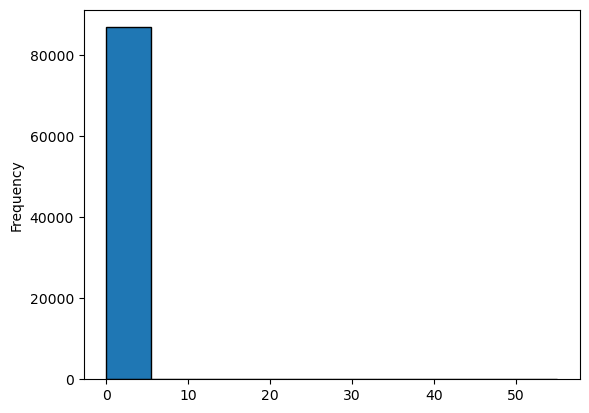

In [98]:
df['family'].plot(kind='hist', edgecolor = 'black')

<AxesSubplot:ylabel='Frequency'>

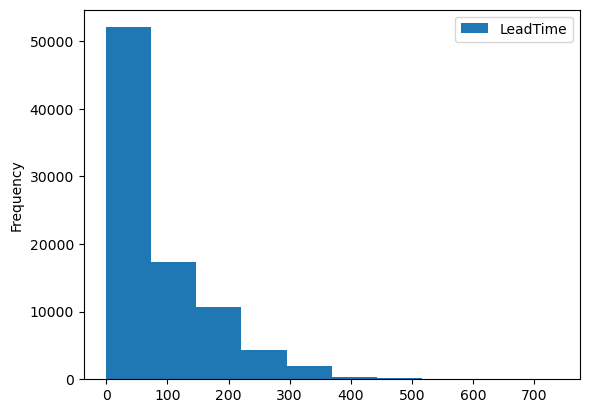

In [100]:
df.plot(x='Hotel', y = 'LeadTime', kind = 'hist')

In [99]:
df.corr()

,LeadTime,ArrivingWeek,WeekendStay,WeekStay,PrevCancel,PrevBook,ChangeBooking,WaitingDays,ADR,ParkSpace,SpecialRequest,family
LeadTime,1.000000,0.100951,0.233682,0.309913,0.005520,-0.076393,0.076778,0.132164,0.019815,-0.085738,0.033009,0.123779
ArrivingWeek,0.100951,1.000000,0.026092,0.027365,0.006633,-0.020759,0.011457,0.013881,0.097688,0.008632,0.046136,0.028448
WeekendStay,0.233682,0.026092,1.000000,0.551159,-0.020675,-0.054139,0.049070,-0.032015,0.036044,-0.042647,0.030442,0.085964
WeekStay,0.309913,0.027365,0.551159,1.000000,-0.018903,-0.056926,0.084200,0.001797,0.050961,-0.043984,0.035440,0.094108
PrevCancel,0.005520,0.006633,-0.020675,-0.018903,1.000000,0.395889,-0.010490,0.003725,-0.050218,-0.003473,0.001600,-0.045011
PrevBook,-0.076393,-0.020759,-0.054139,-0.056926,0.395889,1.000000,0.006030,-0.006053,-0.082875,0.040428,0.027333,-0.110490
ChangeBooking,0.076778,0.011457,0.049070,0.084200,-0.010490,0.006030,1.000000,0.024215,0.001842,0.048891,0.015491,-0.009399
WaitingDays,0.132164,0.013881,-0.032015,0.001797,0.003725,-0.006053,0.024215,1.000000,-0.033440,-0.015966,-0.049763,-0.025506
ADR,0.019815,0.097688,0.036044,0.050961,-0.050218,-0.082875,0.001842,-0.033440,1.000000,0.040511,0.136245,0.384378
ParkSpace,-0.085738,0.008632,-0.042647,-0.043984,-0.003473,0.040428,0.048891,-0.015966,0.040511,1.000000,0.048585,0.033056


/Users/test/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='WaitingDays'>

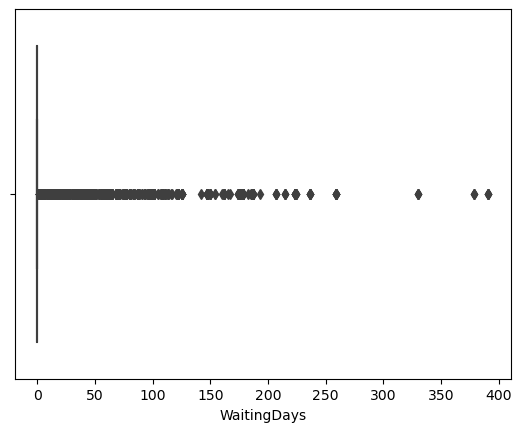

In [101]:
import seaborn as sns
sns.boxplot(df['WaitingDays'])

In [102]:
import numpy as np
Q1 = df["WaitingDays"].quantile(0.25)
Q3 = df["WaitingDays"].quantile(0.75)
IQR = Q3 - Q1
IQR

0.0

In [103]:
p = (df["WaitingDays"]< (Q1 - 1.5 * IQR)) |(df["WaitingDays"] > (Q3 + 1.5 * IQR))
p.value_counts()

False    86084
True       860
Name: WaitingDays, dtype: int64